# Analyse de sentiments ( Assurance france ) 
https://www.kaggle.com/fedi1996/insurance-reviews-france

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
pd.set_option('display.max_rows', None)#
pd.set_option('display.max_columns', None)#


In [281]:
data = pd.read_csv('Comments.csv')

In [282]:
data.head()

,Unnamed: 0,Name,Comment,Month,Year
0,0,Réassurez-moi,Ravi ! La recherche et la comparaison des mutu...,8,2019
1,1,Réassurez-moi,Très satisfaite ! Un conseiller à l'écoute et ...,8,2019
2,2,Réassurez-moi,Je vous avais contacté pour la mise en place e...,8,2019
3,3,Réassurez-moi,Quelques mots sur Réassurez-moi. Je suis très ...,8,2019
4,4,Réassurez-moi,Votre cabinet m'a permis de pouvoir bénéficier...,8,2019


In [283]:
data.isna().sum()

Unnamed: 0     0
Name           0
Comment       16
Month          0
Year           0
dtype: int64

In [284]:
data = data.drop(['Unnamed: 0' , 'Name' , 'Month' , 'Year'] , axis=1)

### Clean text

In [285]:
def clean_text(text):
    text = re.sub(r'@ [A-Za-z0-9]+','',text) #Removed mentions
    text = re.sub(r'#','',text) #remove the #symbol
    text = re.sub(r'RT[\s]+' , '' , text) # remove RT
    text = re.sub(r'https?:\/\/\S+' , '' , text) #Removed hyperlink
    text = "" .join([ch for ch in text if ch not in string.punctuation]) #Remove punctuation
    text = text.replace("  " , " ")
    text = " ".join([x for x in text.split(" ") if not x.isdigit()]) # Removed Numbers
    text = text.lower() # minuscule
    
   
    return text

In [286]:
data['Comment'] = data.Comment.apply(str) # convert Column to string before apply function clean_text

In [287]:
data['Comment'] = data['Comment'].apply(lambda x: clean_text(x))

In [288]:
data.head()

,Comment
0,ravi la recherche et la comparaison des mutuel...
1,très satisfaite un conseiller à lécoute et sym...
2,je vous avais contacté pour la mise en place e...
3,quelques mots sur réassurezmoi je suis très sa...
4,votre cabinet ma permis de pouvoir bénéficier ...


In [289]:
data.shape

(11017, 1)

In [290]:
data.isnull().sum() # aucune valeur manquante dans le dataset

Comment    0
dtype: int64

### remove stop words

In [140]:
import spacy

In [291]:
from spacy.lang.fr.examples import sentences #examples
nlp = spacy.load("fr_core_news_sm")

In [292]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop

In [293]:
def tokenizer(text):
    result = re.split('\W+' , text)
    return result

In [294]:
def remove_stopwords(text):
    result = [word for word in text if word not in fr_stop]
    return result

In [295]:
data['Comment'] = data['Comment'].apply(lambda x: tokenizer(x))

In [296]:
data['Comment'] = data['Comment'].apply(lambda x: remove_stopwords(x))

In [297]:
data.head()

,Comment
0,"[ravi, recherche, comparaison, mutuelles, simp..."
1,"[très, satisfaite, conseiller, lécoute, sympat..."
2,"[contacté, mise, place, janvier, dernier, dun,..."
3,"[mots, réassurezmoi, très, satisfait, services..."
4,"[cabinet, permis, pouvoir, bénéficier, contrat..."


### Lemmatization

In [298]:
data['Comment'] = data['Comment'].apply(', '.join)

In [299]:
data['reviews'] = data['Comment'].apply(lambda x: " ".join([x.lemma_ for x in nlp(x)]))

In [300]:
data.head()

,Comment,reviews
0,"ravi, recherche, comparaison, mutuelles, simpl...","ravi , recherche , comparaison , mutuel , simp..."
1,"très, satisfaite, conseiller, lécoute, sympath...","très , satisfait , conseiller , lécoute , symp..."
2,"contacté, mise, place, janvier, dernier, dun, ...","contacté , mise , place , janvier , dernier , ..."
3,"mots, réassurezmoi, très, satisfait, services,...","mot , réassurezmoi , très , satisfait , servic..."
4,"cabinet, permis, pouvoir, bénéficier, contrat,...","cabinet , permettre , pouvoir , bénéficier , c..."


In [301]:
data = data.drop('Comment' , axis=1)

### Test Vader Sentiment & TextBlob

### Vader sentiment

In [306]:
from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer

In [307]:
analyzer_fr = SentimentIntensityAnalyzer()
phrase = "vilain"
vs = analyzer_fr.polarity_scores(phrase)
print("{:-<50} {}".format(phrase, str(vs)))

vilain-------------------------------------------- {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.296}


In [308]:
data['scores'] = data['reviews'].apply(lambda x: analyzer_fr.polarity_scores(x))

In [309]:
data.head()

,reviews,scores
0,"ravi , recherche , comparaison , mutuel , simp...","{'neg': 0.071, 'neu': 0.792, 'pos': 0.138, 'co..."
1,"très , satisfait , conseiller , lécoute , symp...","{'neg': 0.063, 'neu': 0.704, 'pos': 0.233, 'co..."
2,"contacté , mise , place , janvier , dernier , ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,"mot , réassurezmoi , très , satisfait , servic...","{'neg': 0.0, 'neu': 0.869, 'pos': 0.131, 'comp..."
4,"cabinet , permettre , pouvoir , bénéficier , c...","{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp..."


In [164]:
data['compound'] = data['scores'].apply(lambda x: x['compound'])
data['sentiment_vader']=''
data.loc[data.compound>0,'sentiment_vader']='POSITIVE'
data.loc[data.compound==0,'sentiment_vader']='NEUTRAL'
data.loc[data.compound<0,'sentiment_vader']='NEGATIVE'

In [167]:
data.head()

,reviews,scores,compound,sentiment_vader
0,"ravi , recherche , comparaison , mutuel , simp...","{'neg': 0.071, 'neu': 0.792, 'pos': 0.138, 'co...",0.4939,POSITIVE
1,"très , satisfait , conseiller , lécoute , symp...","{'neg': 0.063, 'neu': 0.704, 'pos': 0.233, 'co...",0.8714,POSITIVE
2,"contacté , mise , place , janvier , dernier , ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
3,"mot , réassurezmoi , très , satisfait , servic...","{'neg': 0.0, 'neu': 0.869, 'pos': 0.131, 'comp...",0.7146,POSITIVE
4,"cabinet , permettre , pouvoir , bénéficier , c...","{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...",0.7076,POSITIVE


In [168]:
data = data.drop(['scores' , 'compound'] , axis=1)

In [169]:
data.head()

,reviews,sentiment_vader
0,"ravi , recherche , comparaison , mutuel , simp...",POSITIVE
1,"très , satisfait , conseiller , lécoute , symp...",POSITIVE
2,"contacté , mise , place , janvier , dernier , ...",NEUTRAL
3,"mot , réassurezmoi , très , satisfait , servic...",POSITIVE
4,"cabinet , permettre , pouvoir , bénéficier , c...",POSITIVE


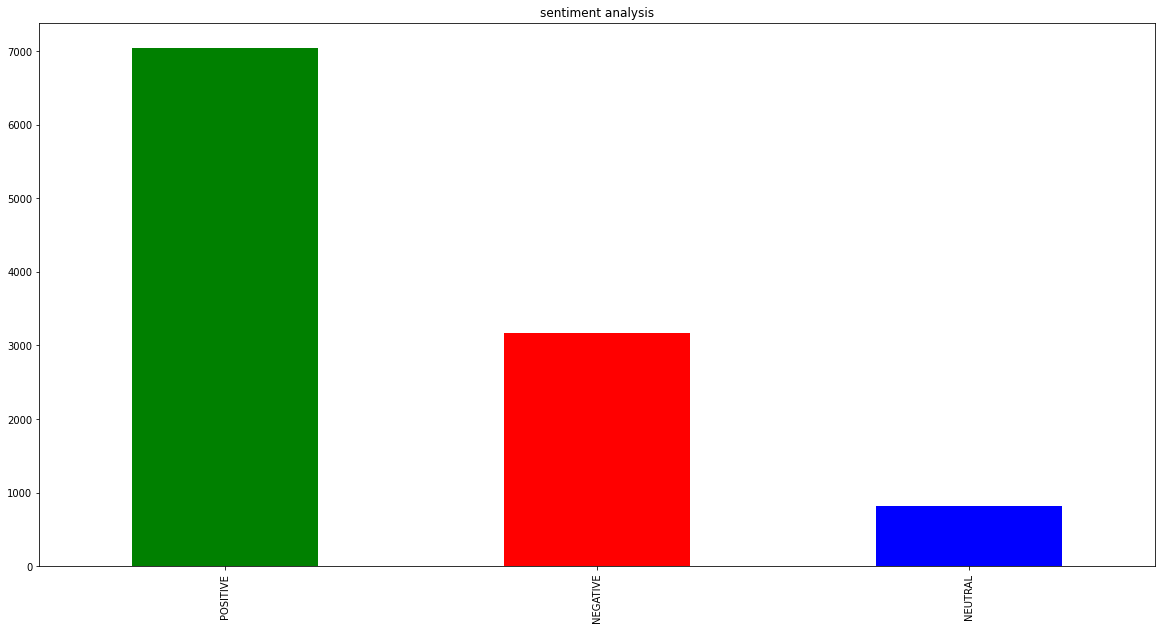

In [257]:
data.sentiment_vader.value_counts().plot(kind='bar',title="sentiment analysis" , figsize=(20,10) , color = colors)

In [176]:
print((data.sentiment_vader.value_counts() / data.shape[0])*100)

POSITIVE    63.846782
NEGATIVE    28.764636
NEUTRAL      7.388581
Name: sentiment_vader, dtype: float64


### TextBlob

In [178]:
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

In [180]:
sentiment_blob = []
for blob in data['reviews']:
    sb = tb(blob).sentiment[0]
    if (sb > 0):
        sentiment_blob.append('POSITIVE')
    elif (sb < 0):
        sentiment_blob.append('NEGATIVE')
    else:
        sentiment_blob.append('NEUTRAL')
        
data['sentiment_blob'] = sentiment_blob

In [248]:
data.head()

,reviews,sentiment_vader,sentiment_blob
0,"ravi , recherche , comparaison , mutuel , simp...",POSITIVE,POSITIVE
1,"très , satisfait , conseiller , lécoute , symp...",POSITIVE,POSITIVE
2,"contacté , mise , place , janvier , dernier , ...",NEUTRAL,POSITIVE
3,"mot , réassurezmoi , très , satisfait , servic...",POSITIVE,POSITIVE
4,"cabinet , permettre , pouvoir , bénéficier , c...",POSITIVE,POSITIVE


In [255]:
colors = ['green','red','blue']

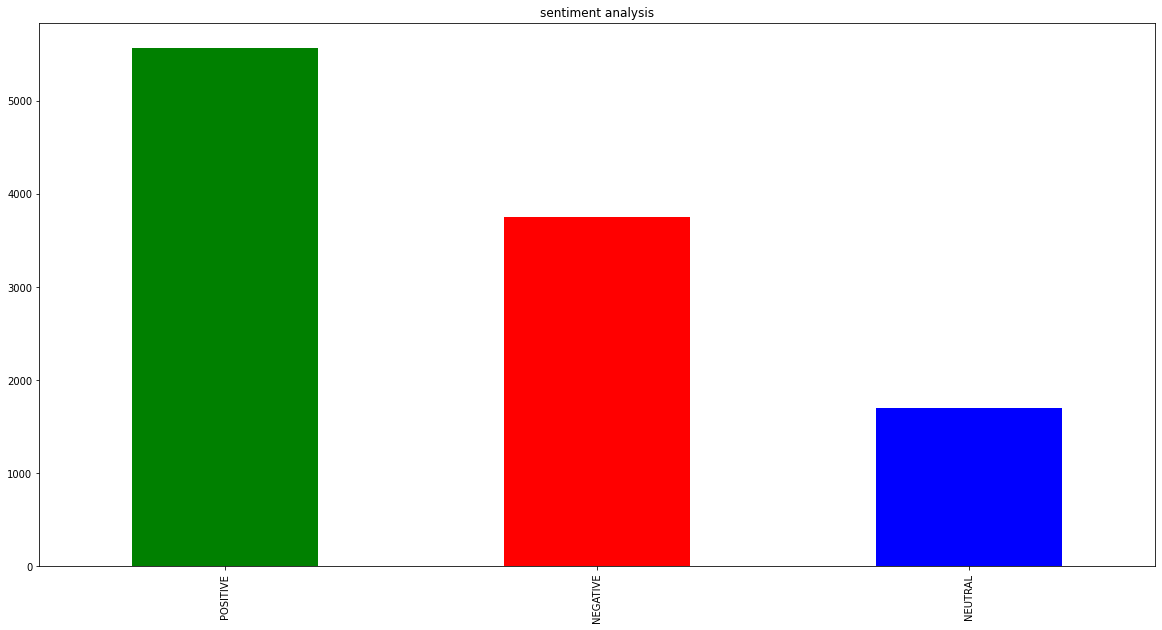

In [256]:
data.sentiment_blob.value_counts().plot(kind='bar',title="sentiment analysis" , figsize=(20,10) , color= colors)

In [184]:
print((data.sentiment_blob.value_counts() / data.shape[0])*100)

POSITIVE    50.476536
NEGATIVE    34.065535
NEUTRAL     15.457929
Name: sentiment_blob, dtype: float64


### Difference TextBlob et Vader

In [217]:
vader_blob_positive = data[(data['sentiment_vader'] == 'POSITIVE') & (data['sentiment_blob'] == 'POSITIVE')]
vader_blob_positive.head()

,reviews,sentiment_vader,sentiment_blob
0,"ravi , recherche , comparaison , mutuel , simp...",POSITIVE,POSITIVE
1,"très , satisfait , conseiller , lécoute , symp...",POSITIVE,POSITIVE
3,"mot , réassurezmoi , très , satisfait , servic...",POSITIVE,POSITIVE
4,"cabinet , permettre , pouvoir , bénéficier , c...",POSITIVE,POSITIVE
5,"chercher , temps , mutuel , santé , prendre , ...",POSITIVE,POSITIVE


In [239]:
pos = vader_blob_positive.sentiment_vader.value_counts().sum()
print(pos)

4380


In [222]:
vader_blob_negative = data[(data['sentiment_vader'] == 'NEGATIVE') & (data['sentiment_blob'] == 'NEGATIVE')]
vader_blob_negative.head()

,reviews,sentiment_vader,sentiment_blob
24,"ridicule , mediocre , decu , heureusement , je...",NEGATIVE,NEGATIVE
34,"mot , minable , mediocre , vendre , reve , ens...",NEGATIVE,NEGATIVE
67,"fuir , mauvais , remboursement , appeler , per...",NEGATIVE,NEGATIVE
72,"accident , cassé , plusieur , dent , cauchemar...",NEGATIVE,NEGATIVE
98,"argument , commercial , bidon , l , illimit , ...",NEGATIVE,NEGATIVE


In [240]:
neg = vader_blob_negative.sentiment_vader.value_counts().sum()

In [224]:
vader_blob_neutral = data[(data['sentiment_vader'] == 'NEUTRAL') & (data['sentiment_blob'] == 'NEUTRAL')]
vader_blob_neutral.head()


,reviews,sentiment_vader,sentiment_blob
76,"lensembl , contant , mutuel , adapter , besoin",NEUTRAL,NEUTRAL
84,"j , prendre , mutuelle , mutuel , faire , pose...",NEUTRAL,NEUTRAL
93,"pub , radio , cest , matraquage , signer , y ,...",NEUTRAL,NEUTRAL
129,"pouvon , recours",NEUTRAL,NEUTRAL
153,"jai , alicia , suivre , dossier , remerci , co...",NEUTRAL,NEUTRAL


In [241]:
neu = vader_blob_neutral.sentiment_vader.value_counts().sum()

In [242]:
percentage_vader_blob = (pos + neg + neu)/data.shape[0]


In [243]:
percentage_vader_blob

0.5974403195062177